### Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
import kagglehub

path = kagglehub.dataset_download("netflix-inc/netflix-prize-data")

print("Path to dataset files:", path)

100%|██████████| 683M/683M [00:03<00:00, 184MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2


In [ ]:
import os

# Iterate directory tree
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        # Print full path for each file in current directory
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/README
/root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/combined_data_2.txt
/root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/combined_data_4.txt
/root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/qualifying.txt
/root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/combined_data_3.txt
/root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/probe.txt
/root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/movie_titles.csv
/root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/combined_data_1.txt


In [ ]:
# File paths for Netflix Prize Dataset
files = [
    '/root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/combined_data_1.txt',
    '/root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/combined_data_2.txt',
    '/root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/combined_data_3.txt',
    '/root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/combined_data_4.txt'
]

# Empty list to store parsed rows
data = []

for file in files:
    print(f"Opening file: {file}")
    with open(file) as f:  # Open file for reading
        for line in f:  # Iterate over each line
            line = line.strip()  # Remove any leading or trailing whitespace
            if line.endswith(':'):  # Check current line is a movie ID
                movie_id = int(line.replace(':', ''))  # Store the movie ID
            else:  # If it's user rating data
                user_id, rating, date = line.split(',')  # Split to component
                data.append((movie_id, int(user_id), int(rating), date))  # Append as tuple

# Convert collected data into DataFrame
df = pd.DataFrame(data, columns=['movie_id', 'user_id', 'rating', 'date'])
df

Opening file: /root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/combined_data_1.txt
Opening file: /root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/combined_data_2.txt
Opening file: /root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/combined_data_3.txt
Opening file: /root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/combined_data_4.txt


,movie_id,user_id,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03
...,...,...,...,...
100480502,17770,1790158,4,2005-11-01
100480503,17770,1608708,3,2005-07-19
100480504,17770,234275,1,2004-08-07
100480505,17770,255278,4,2004-05-28


In [ ]:
# Number of observations and features
df.shape

(100480507, 4)

In [ ]:
df.dtypes

,0
movie_id,int64
user_id,int64
rating,int64
date,object


Here we can see that the column 'date' has a wrong data type which is object

In [ ]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df.dtypes

,0
movie_id,int64
user_id,int64
rating,int64
date,datetime64[ns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 4 columns):
 #   Column    Dtype         
---  ------    -----         
 0   movie_id  int64         
 1   user_id   int64         
 2   rating    int64         
 3   date      datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.0 GB


This Netflix Prize dataset contains over 100 million rows. Each row corresponds to a single rating provided by a user for a specific movie.

There are 4 columns in this dataset:
- movie_id: The unique identifier for a movie
- user_id: The unique identifier for a user who provided the rating
- rating: The rating given by the user to the movie (typically a value between 1 and 5)
- date: The date when the user rated the movie





In [ ]:
movie_titles = pd.read_csv("/root/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/movie_titles.csv",
                           encoding='latin1', on_bad_lines='skip', header=None)
movie_titles

,0,1,2
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17429,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17430,17767,2004.0,Fidel Castro: American Experience
17431,17768,2000.0,Epoch
17432,17769,2003.0,The Company


In [ ]:
# Rename column
movie_titles.columns = ['movie_id', 'year_released', 'movie_title']
movie_titles

,movie_id,year_released,movie_title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17429,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17430,17767,2004.0,Fidel Castro: American Experience
17431,17768,2000.0,Epoch
17432,17769,2003.0,The Company


In [ ]:
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17434 entries, 0 to 17433
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       17434 non-null  int64  
 1   year_released  17427 non-null  float64
 2   movie_title    17434 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 408.7+ KB


This DataFrame contains 17,434 rows and 3 columns:

- movie_id: integer, unique identifier for each movie, no missing values
- year_released: floating-point, release year of the movie, 7 missing values
- movie_title: string, movie titles, no missing values

In [ ]:
# Convert year released to integer
movie_titles['year_released'] = movie_titles['year_released'].astype('Int64')
movie_titles.dtypes

,0
movie_id,int64
year_released,Int64
movie_title,object


In [ ]:
# Merge two DataFrame: df and movie_titles, based on movie_id column (using left join)
df_merged = df.merge(movie_titles[['movie_id', 'year_released', 'movie_title']], on='movie_id', how='left')
df_merged

,movie_id,user_id,rating,date,year_released,movie_title
0,1,1488844,3,2005-09-06,2003,Dinosaur Planet
1,1,822109,5,2005-05-13,2003,Dinosaur Planet
2,1,885013,4,2005-10-19,2003,Dinosaur Planet
3,1,30878,4,2005-12-26,2003,Dinosaur Planet
4,1,823519,3,2004-05-03,2003,Dinosaur Planet
...,...,...,...,...,...,...
100480502,17770,1790158,4,2005-11-01,2003,Alien Hunter
100480503,17770,1608708,3,2005-07-19,2003,Alien Hunter
100480504,17770,234275,1,2004-08-07,2003,Alien Hunter
100480505,17770,255278,4,2004-05-28,2003,Alien Hunter


### EDA and Data Preprocessing

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   movie_id       int64         
 1   user_id        int64         
 2   rating         int64         
 3   date           datetime64[ns]
 4   year_released  Int64         
 5   movie_title    object        
dtypes: Int64(1), datetime64[ns](1), int64(3), object(1)
memory usage: 4.6+ GB


In [ ]:
# Percentage of missing values
df_merged.isna().sum()/ df_merged.size * 100

,0
movie_id,0.000000
user_id,0.000000
rating,0.000000
date,0.000000
year_released,0.248062
movie_title,0.247901


- movie_id, user_id, rating, date: No missing values (0%)
- year_released: 0.25% missing, some movies lack release year info
- movie_title: 0.25% missing, some movies lack title info

In [ ]:
# Rows with missing values in year_released or movie_title will be dropped
df_merged = df_merged.dropna()
df_merged.isna().sum()/ df_merged.size * 100

,0
movie_id,0.0
user_id,0.0
rating,0.0
date,0.0
year_released,0.0
movie_title,0.0


In [ ]:
# df_merged[df_merged.duplicated()]
df_merged.duplicated().sum()
# Ensures the resulting DataFrame has no duplicate rows

0

In [ ]:
df_merged.describe()

,movie_id,user_id,rating,date,year_released
count,9.898499e+07,9.898499e+07,9.898499e+07,98984986,98984986.0
mean,9.069933e+03,1.322490e+06,3.602592e+00,2004-10-08 22:04:18.140233728,1993.938049
min,1.000000e+00,6.000000e+00,1.000000e+00,1999-11-11 00:00:00,1896.0
25%,4.661000e+03,6.611970e+05,3.000000e+00,2004-04-30 00:00:00,1990.0
50%,9.074000e+03,1.319012e+06,4.000000e+00,2005-01-21 00:00:00,1998.0
75%,1.362900e+04,1.984445e+06,4.000000e+00,2005-07-08 00:00:00,2002.0
max,1.777000e+04,2.649429e+06,5.000000e+00,2005-12-31 00:00:00,2005.0
std,5.135653e+03,7.645350e+05,1.085220e+00,NaN,12.376554


In [ ]:
print(f"Distinct User IDs: {df_merged['user_id'].nunique()}")
print(f"Distinct Movie Titles: {df_merged['movie_title'].nunique()}")

Distinct User IDs: 480178
Distinct Movie Titles: 17019


In [ ]:
df_merged.describe(include='object')

,movie_title
count,98984986
unique,17019
top,Miss Congeniality
freq,232944


In [ ]:
# Column with numeric data type
numeric_cols = df_merged.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['movie_id', 'user_id', 'rating', 'year_released'], dtype='object')

In [ ]:
# Calculate the correlation matrix for the numeric column
correlation_matrix = df_merged[numeric_cols].corr()
correlation_matrix

,movie_id,user_id,rating,year_released
movie_id,1.000000,0.000174,0.009793,-0.005423
user_id,0.000174,1.000000,-0.000198,-0.000369
rating,0.009793,-0.000198,1.000000,-0.080768
year_released,-0.005423,-0.000369,-0.080768,1.000000


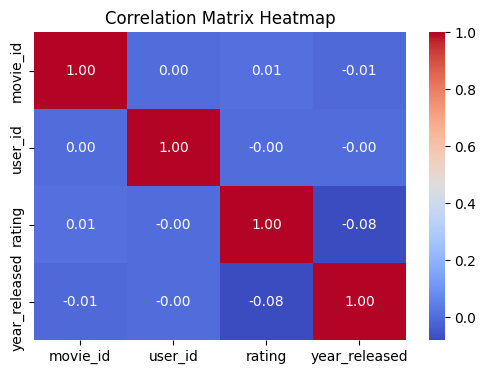

In [ ]:
# Visualize correlation using heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title("Correlation Matrix Heatmap")
plt.show()

Correlation with rating:
- movie_id: Correlation = 0.009793 (very weak positive correlation; almost no relationship)
- user_id: Correlation = -0.000198 (very weak negative correlation; no significant relationship)
- year_released: Correlation = -0.080768 (weak negative correlation; older movies may slightly trend toward lower ratings)

In [ ]:
# Extract year from column 'date' and create a new column 'year'
df_merged['year'] = df_merged['date'].dt.year

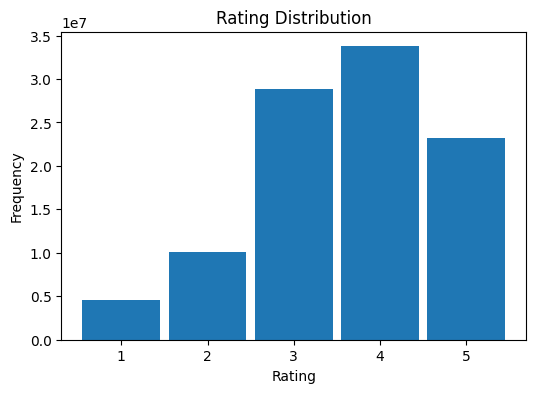

In [ ]:
# Visualize distribution of ratings
plt.figure(figsize=(6, 4))
plt.hist(df['rating'], bins=[i for i in range (1,7)], rwidth=0.9)
plt.xticks([1.5,2.5,3.5,4.5,5.5], [i for i in range (1,6)])
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The bar chart shows the distribution of ratings (1 to 5) given by users. Ratings are skewed toward positive values, with Rating 4 being the most frequent (close to 35 million), followed by Rating 3 and Rating 5. Rating 1 is the least common, indicating users rarely rate movies poorly. Overall, users tend to give favorable ratings.

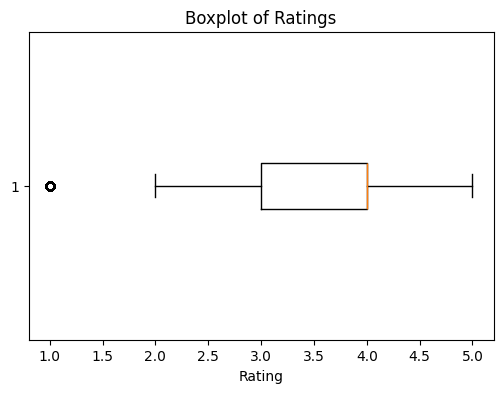

In [ ]:
# Visualize boxplot of ratings
plt.figure(figsize=(6, 4))
plt.boxplot(df_merged['rating'], vert=False)
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()

The ratings are positively skewed, with the majority of ratings being 3 or higher. The median rating of 4 confirms that users tend to rate movies favorably, with very few low ratings (outliers at 1).

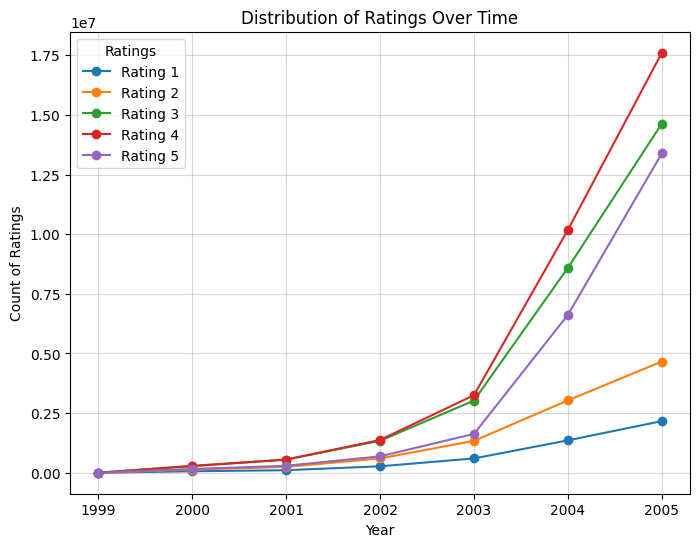

In [ ]:
# Visualize distribution of ratings over time with a line plot

# Group by 'year' and 'rating' and count occurrences
ratings_over_time = df_merged.groupby(['year', 'rating'])['rating'].count().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
for rating in ratings_over_time.columns:
    plt.plot(ratings_over_time.index, ratings_over_time[rating], marker='o', label=f'Rating {rating}')

plt.title('Distribution of Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Count of Ratings')
plt.legend(title='Ratings')
plt.grid(alpha=0.5)
plt.show()

The number of ratings grew significantly between 1999 and 2005, with a sharp rise starting in 2003, reflecting increased user activity and platform growth. Rating 4 consistently had the highest count, followed by Rating 5, indicating a tendency for users to rate movies favorably. Ratings 1 and 2, though less common, showed steady growth over time. The rapid acceleration after 2003 was most pronounced for Ratings 4 and 5, highlighting a shift toward higher user engagement. By 2005, all rating categories peaked, with Rating 4 dominating, showing the platform’s highest level of user participation during this period.

In [ ]:
# Group by year and rating, and count the occurrences of each rating per year
ratings_per_year = df_merged.groupby(['year', 'rating']).size().unstack()

# Calculate percentage for each rating per year
ratings_percentage = ratings_per_year.div(ratings_per_year.sum(axis=1), axis=0) * 100
ratings_percentage

rating,1,2,3,4,5
year,,,,,
1999,8.033629,14.479215,31.293788,28.397945,17.795423
2000,6.728344,14.369257,31.670166,30.200069,17.032165
2001,6.081815,14.083197,31.533923,31.583744,16.717321
2002,6.305654,14.019504,31.395650,32.216305,16.062887
2003,6.089312,13.571707,30.762053,33.032578,16.544350
2004,4.557825,10.184616,28.844705,34.189237,22.223616
2005,4.124252,8.887493,27.900571,33.564109,25.523575


- From 1999 to 2002, ratings were more evenly distributed, with Ratings 3 and 4 being the most frequent (around 30-33%), while Ratings 1 and 2 were less common but still notable (6-14%).
- From 2003 to 2005, higher ratings became more prevalent, with Rating 4 increasing to 34.2% by 2004 and Rating 5 rising sharply to 25.5% in 2005, while Ratings 1 and 2 steadily declined, and Rating 3 remained relatively stable at 27.9-31.7%.

In [ ]:
print("Percentage of ratings with a value of 1:")
print(df_merged[df_merged['rating'] == 1].shape[0]/ df_merged.shape[0] * 100, "%")

Percentage of ratings with a value of 1:
4.602479814463983 %


In [ ]:
ratings_1_per_year = df_merged[df_merged['rating'] == 1].groupby('year')['rating'].count()
ratings_1_per_year

,rating
year,
1999,172
2000,61439
2001,105838
2002,268929
2003,599047
2004,1357069
2005,2163270


In [ ]:
# Calculate percentage difference between consecutive years
ratings_1_percentage_diff = ratings_1_per_year.pct_change() * 100

ratings_1_percentage_diff = ratings_1_percentage_diff.dropna()  # Drop first NaN value
print("Percentage Difference in Rating 1 Count Between Consecutive Years:")
ratings_1_percentage_diff

Percentage Difference in Rating 1 Count Between Consecutive Years:


,rating
year,
2000,35620.348837
2001,72.265174
2002,154.094938
2003,122.752846
2004,126.537984
2005,59.407517


- Moderate percentage increases (72.27% to 126.54%) in subsequent years suggest a consistent growth in low ratings. This could reflect an expanding user base or a growing movie catalog, leading to more varied user feedback.
- The drop to 59.41% in 2005 suggests a slowing rate of increase in low ratings. This could indicate market saturation, changes in platform dynamics, or improvements in recommendation algorithms that reduced user dissatisfaction.

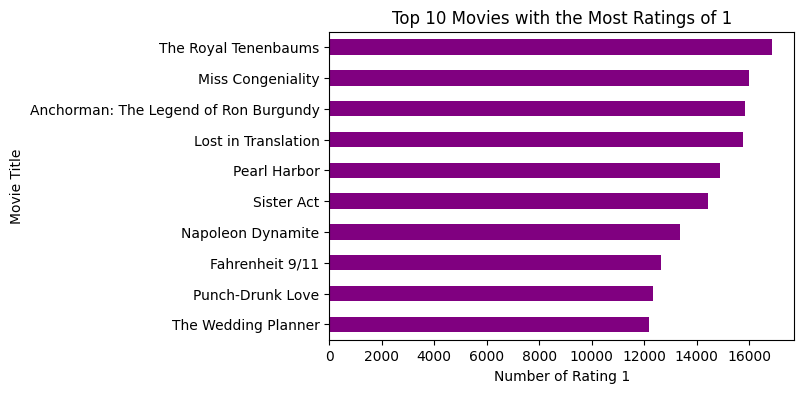

In [ ]:
# Visualize top 10 movies with the most ratings of 1

# Filter and count the number of rating 1 for each movie
movies_with_rating_1 = df_merged[df_merged['rating'] == 1].groupby('movie_title')['rating'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(6, 4))
movies_with_rating_1.plot(kind='barh', color='purple')
plt.title('Top 10 Movies with the Most Ratings of 1')
plt.xlabel('Number of Rating 1')
plt.ylabel('Movie Title')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

This chart displays the top 10 movies with the highest number of 1-star ratings, indicating significant user dissatisfaction. "The Royal Tenenbaums" and "Miss Congeniality" suggest these movies were poorly received by a big portion of the audience.

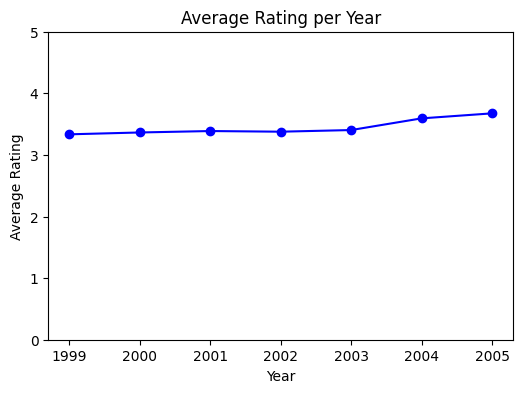

In [ ]:
# Visualize average rating per year
avg_rating_per_year = df_merged.groupby('year')['rating'].mean()
plt.figure(figsize=(6, 4))
plt.plot(avg_rating_per_year.index, avg_rating_per_year.values, marker='o', linestyle='-', color='b')
plt.ylim(0, 5)
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

The graph illustrates the average rating per year from 1999 to 2005, showing a steady upward trend, suggesting a gradual increase in user satisfaction or more positive rating behavior over time.

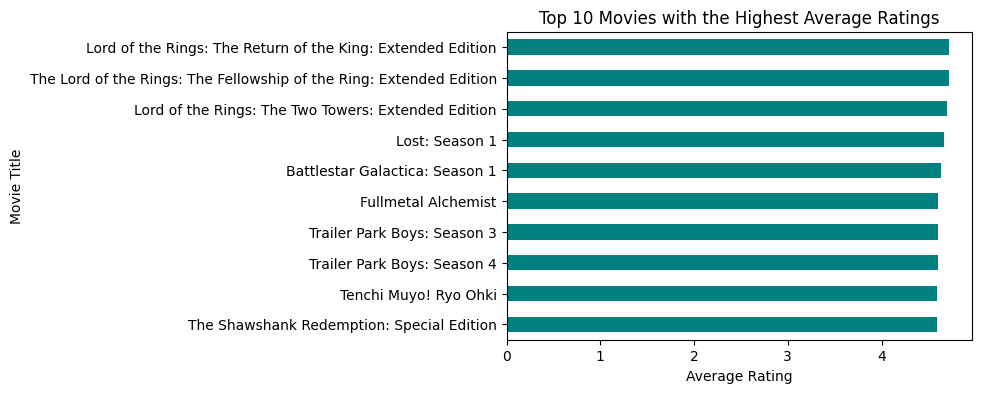

In [ ]:
# Visualize top 10 movies with highest average ratings
avg_rating_per_movie = df_merged.groupby('movie_title')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(6, 4))
avg_rating_per_movie.plot(kind='barh', color='teal')  # Use barh for horizontal bars
plt.title('Top 10 Movies with the Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.gca().invert_yaxis()
plt.show()

This chart highlights the top 10 movies and series with the highest average ratings. Popular franchises such as "The Lord of the Rings" and critically acclaimed titles like "The Shawshank Redemption: Special Edition" dominate the list.

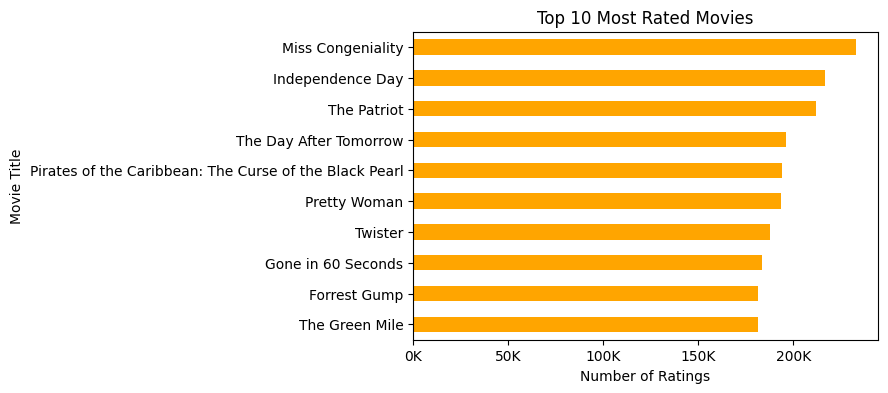

In [ ]:
# Visualize  top 10 most rated movies
ratings_per_movie = df_merged.groupby('movie_title')['rating'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(6, 4))
ratings_per_movie.plot(kind='barh', color='orange')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.gca().invert_yaxis()
plt.show()

This chart presents the top 10 most rated movies, showcasing their broad audience engagement. Titles such as "Miss Congeniality" and "The Green Mile" lead the list.

year_released
2004    10272586
2003     9480944
2002     8608283
2001     7106059
2000     6349861
1999     5508278
1998     4318227
1997     3680569
1996     3319183
1995     3307640
Name: movie_title, dtype: int64


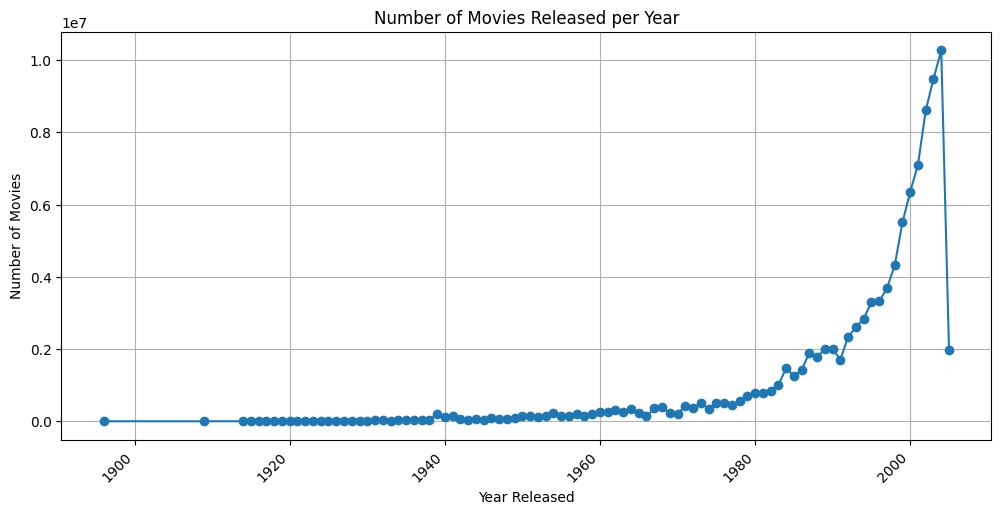

In [ ]:
# Visualize the number of movies released per year as time series

movies_per_year = df_merged.groupby('year_released')['movie_title'].count()
print(movies_per_year.sort_values(ascending=False).head(10))

# Convert column 'year_released' to datetime
movies_per_year.index = pd.to_datetime(movies_per_year.index, format='%Y')

plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='line', marker='o')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year Released')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

This graph illustrates the number of movies released each year, showcasing a steady increase in releases over the decades, with a significant surge observed after 1990, reflecting the industry's growth and the rising demand for cinematic content.

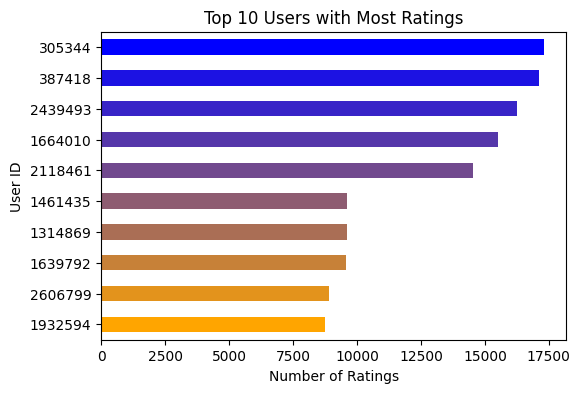

In [ ]:
# Calculate the number of ratings per user
top_users = df_merged.groupby('user_id')['rating'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(6, 4))
cmap = LinearSegmentedColormap.from_list('blue_orange', ['blue', 'orange'])
colors = cmap(np.linspace(0, 1, len(top_users)))
top_users.plot(kind='barh', color=colors)
plt.title('Top 10 Users with Most Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('User ID')
plt.gca().invert_yaxis()
plt.show()

This chart highlights the top 10 users with the highest number of movie ratings. User ID 305344 leads with the most ratings, indicating a significant contribution to the dataset.

### Reduce Dataset

Focus on the most active users and the most popular movies, which can improve the performance of the model and reduce computational costs by working with a smaller dataset

In [ ]:
# Group by 'user_id' and count the number of ratings for each user
group = df_merged.groupby('user_id')['rating'].count()

# Sort the users in descending order based on the number of ratings and select the top 10,000 users
top_users = group.sort_values(ascending=False)[:10000]

# Rename column
top_users = top_users.rename('user_count')
top_users

,user_count
user_id,
305344,17311
387418,17099
2439493,16240
1664010,15505
2118461,14552
...,...
1690104,1086
79799,1086
783797,1086


In [ ]:
# Group by 'movie_id' and count the number of ratings for each movie
group = df_merged.groupby('movie_id')['rating'].count()

# Sort the movies in descending order based on the number of ratings and select the top 3,000 movies
top_movies = group.sort_values(ascending=False)[:3000]

top_movies = top_movies.rename('movie_count')
top_movies

,movie_count
movie_id,
5317,232944
15124,216596
14313,200832
15205,196397
1905,193941
...,...
4155,5266
1409,5266
15457,5264


In [ ]:
# Filter dataset to include only top 10,000 users and top 3,000 movies by doing inner join with 'top_users' and 'top_movies' dataset
df_reduced = df_merged.join(top_users, how='inner', on='user_id', rsuffix='_user')
df_reduced = df_reduced.join(top_movies, how='inner', on='movie_id', rsuffix='_movie')
df_reduced

,movie_id,user_id,rating,date,year_released,movie_title,user_count,movie_count
5111,8,1744889,1,2005-08-25,2004,What the #$*! Do We Know!?,2651,14910
5149,8,1488844,4,2005-05-12,2004,What the #$*! Do We Know!?,2177,14910
5167,8,306466,4,2005-07-01,2004,What the #$*! Do We Know!?,2261,14910
5176,8,1987434,4,2005-10-04,2004,What the #$*! Do We Know!?,1117,14910
5181,8,573364,1,2005-11-22,2004,What the #$*! Do We Know!?,1281,14910
...,...,...,...,...,...,...,...,...
100479556,17769,709867,3,2004-06-05,2003,The Company,1124,6749
100479560,17769,2480287,2,2004-06-03,2003,The Company,1690,6749
100479561,17769,1602924,3,2004-08-23,2003,The Company,1640,6749
100479572,17769,234275,1,2004-10-04,2003,The Company,1451,6749


In [ ]:
df_reduced['rating'].value_counts()

,count
rating,
3,3803055
4,3680661
5,2069475
2,1366800
1,546594


Encoding and Feature Selection

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Encoding categorical columns (user_id and movie_id) using LabelEncoder
user_enc = LabelEncoder()
movie_enc = LabelEncoder()

df_reduced['user'] = user_enc.fit_transform(df_reduced['user_id'])
df_reduced['movie'] = movie_enc.fit_transform(df_reduced['movie_id'])

# Initialize MinMaxScaler for normalization
scaler = MinMaxScaler()

# Normalize columns (year_released, user_count, and movie_count)
df_reduced[['year_released', 'user_count', 'movie_count']] = scaler.fit_transform(
    df_reduced[['year_released', 'user_count', 'movie_count']]
)

### KNN

In [ ]:
# Split the data into train and test sets
train_data, test_data = train_test_split(df_reduced, test_size=0.2, random_state=42)

In [ ]:
# Create movie features matrix using the training data
movie_features = train_data[['movie_id', 'year_released', 'user_count', 'movie_count']]
movie_features.set_index('movie_id', inplace=True)  # movie_id as the index
movie_features

,year_released,user_count,movie_count
movie_id,,,
6449,0.941176,0.018367,0.181284
11337,0.929412,0.017072,0.489751
13673,0.882353,0.000616,0.202247
6190,0.788235,0.012018,0.060324
4656,0.941176,0.028043,0.551305
...,...,...,...
3648,0.800000,0.018182,0.151967
6716,0.764706,0.006225,0.130618
15609,0.952941,0.018921,0.026690


In [ ]:
# Columns used for training
training_features = ['year_released', 'user_count', 'movie_count']

# Filter movie_features to include only training features
movie_features_filtered = movie_features[training_features]

# Fit model
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(movie_features_filtered)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
movie_features_filtered

,year_released,user_count,movie_count
movie_id,,,
6449,0.941176,0.018367,0.181284
11337,0.929412,0.017072,0.489751
13673,0.882353,0.000616,0.202247
6190,0.788235,0.012018,0.060324
4656,0.941176,0.028043,0.551305
...,...,...,...
3648,0.800000,0.018182,0.151967
6716,0.764706,0.006225,0.130618
15609,0.952941,0.018921,0.026690


In [ ]:
predicted_ratings = []
actual_ratings = []

# Iterate test data
for _, row in test_data.iterrows():
    user_id = row['user']
    movie_id = row['movie_id']

    # Skip if movie is not in the training data
    if movie_id not in movie_features_filtered.index:
        continue

    movie_vector = movie_features_filtered.loc[movie_id]

    # Find the nearest neighbors for the movie
    distances, indices = knn.kneighbors(movie_vector, n_neighbors=5)

    # Predict the rating as the mean rating of the nearest neighbors
    neighbor_ids = movie_features_filtered.index[indices.flatten()]
    neighbor_ratings = train_data[train_data['movie_id'].isin(neighbor_ids)]['rating']
    predicted_rating = neighbor_ratings.mean()

    predicted_ratings.append(predicted_rating)
    actual_ratings.append(row['rating'])


#  MSE
mse_knn_content = mean_squared_error(actual_ratings, predicted_ratings)
print(f'KNN Mean Squared Error: {mse_knn_content}')

KNN Mean Squared Error: 1.2569707192557752


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Threshold for binary
threshold = 3.0

# Convert predicted and actual ratings into binary labels
classification_predictions_knn = [1 if rating >= threshold else 0 for rating in predicted_ratings]
classification_targets_knn = [1 if rating >= threshold else 0 for rating in actual_ratings]

# Calculate classification metrics
accuracy_knn = accuracy_score(classification_targets_knn, classification_predictions_knn)
precision_knn = precision_score(classification_targets_knn, classification_predictions_knn)
recall_knn = recall_score(classification_targets_knn, classification_predictions_knn)
f1_knn = f1_score(classification_targets_knn, classification_predictions_knn)

print(f'KNN Classification Metrics:')
print(f'Accuracy: {accuracy_knn:.4f}')
print(f'Precision: {precision_knn:.4f}')
print(f'Recall: {recall_knn:.4f}')
print(f'F1 Score: {f1_knn:.4f}')


KNN Classification Metrics:
Accuracy: 0.7249
Precision: 0.8397
Recall: 0.7389
F1 Score: 0.7861


Function **recommend_movies_knn** Description

- **Input**: User ID (user_id), reduced dataset (df_reduced), trained KNN model (knn), and movie features matrix (movie_features).

- **Process**: Encode the user ID, find unrated movies, predict ratings for unrated movies using KNN and similarity scores, and return the top-rated movies with their IDs and titles.

- **Output**: A DataFrame containing the top 10 recommended movies, including movie_id, predicted_rating, and movie_title.

In [ ]:
def recommend_movies_knn(user_id, df_reduced, knn, movie_features):
    # Extract unique movie IDs from the dataset
    movie_ids = df_reduced['movie'].unique()

    # Check if user_id exists and encode it
    if user_id not in user_enc.classes_:
        raise ValueError(f"User ID {user_id} is not in the training data.")
    encoded_user_id = user_enc.transform([user_id])[0]

    # Get movies already rated by the user
    rated_movies = df_reduced[df_reduced['user'] == encoded_user_id]['movie'].unique()

    # Find unrated movies
    unrated_movies = [movie for movie in movie_ids if movie not in rated_movies]

    # Make recommendations
    recommendations = []
    for unrated_movie in unrated_movies:
        # Get feature vector of unrated movie
        movie_idx = np.where(movie_ids == unrated_movie)[0][0]
        movie_vector = movie_features[movie_idx].reshape(1, -1)

        # Find nearest neighbors (top 5 similar movie)
        distances, indices = knn.kneighbors(movie_vector, n_neighbors=5)
        neighbors = indices.flatten()

        # Predict rating based on neighbor ratings
        sim_scores = 1 - distances.flatten()  # Convert distance to similarity
        rated_neighbors = [movie_ids[idx] for idx in neighbors if movie_ids[idx] in rated_movies]

        if rated_neighbors:
            ratings = df_reduced[df_reduced['movie'].isin(rated_neighbors) & (df_reduced['user'] == encoded_user_id)]['rating'].values
            predicted_rating = np.dot(sim_scores[:len(ratings)], ratings) / np.sum(sim_scores[:len(ratings)])
            recommendations.append((unrated_movie, predicted_rating))

    # Sort recommendations by predicted ratings
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

    # Map movie ID and titles
    recommended_movie_ids = [rec[0] for rec in recommendations[:10]]
    movie_titles = df_reduced[df_reduced['movie'].isin(recommended_movie_ids)][['movie_id', 'movie_title']].drop_duplicates()

    # Create recommendation
    recommended_movies_df = pd.DataFrame({
        'movie_id': recommended_movie_ids,
        'predicted_rating': [rec[1] for rec in recommendations[:10]]
    }).merge(movie_titles, on='movie_id', how='left')

    return recommended_movies_df.reset_index(drop=True)

In [ ]:
user_id = 306466
top_10_movies_knn = recommend_movies_knn(user_id, df_reduced, knn, movie_features)
top_10_movies_knn


,movie_id,predicted_rating,movie_title
0,6386,4.333310,Sister Act
1,7234,4.329156,Men of Honor
2,4996,4.318265,Gone in 60 Seconds
3,16406,4.266773,The Prince and Me
4,9242,4.220131,All About My Mother
5,10061,4.215419,Smallville: Season 3
6,10111,4.210833,Sons of Katie Elder
7,7635,4.200593,Anchorman: The Legend of Ron Burgundy
8,12966,4.198737,The Aviator
9,10598,4.190264,Chappelle's Show: Season 2


### Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Reshape, Dot, Embedding, Concatenate, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

In [ ]:
# Features: user and movie pairs
X = df_reduced[['user', 'movie']].values
# Labels: ratings given by users
y = df_reduced['rating'].values

In [ ]:
# Split the dataset into training, testing, and validation subsets
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size=0.2)

In [ ]:
# Separate user and movie IDs for embedding inputs
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_val_array = [X_val[:, 0], X_val[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [ ]:
# Dimension for users, movies, and embeddings
n_users = df_reduced['user'].nunique()
n_movies = df_reduced['movie'].nunique()
embedding_dim = 100

In [ ]:
# User embedding
user_input = Input(shape=(1,))
user_embedding = Embedding(input_dim=n_users, output_dim=embedding_dim,
                            embeddings_initializer='he_normal',
                            embeddings_regularizer=l2(1e-7))(user_input)
user_vector = Reshape((embedding_dim,))(user_embedding)

In [ ]:
# Movie embedding
movie_input = Input(shape=(1,))
movie_embedding = Embedding(input_dim=n_movies, output_dim=embedding_dim,
                             embeddings_initializer='he_normal',
                             embeddings_regularizer=l2(1e-7))(movie_input)
movie_vector = Reshape((embedding_dim,))(movie_embedding)

In [ ]:
# Compute similarity and combine embeddings
similarity = Dot(axes=1)([user_vector, movie_vector]) # represents the interaction or affinity between the user and the movie
# Creates combined feature vector that includes the latent features of both user and movie
combined_features = Concatenate()([user_vector, movie_vector, similarity])

In [ ]:
# Add dropout layers and dense layers for prediction

# Apply 20% dropout to prevent overfitting by randomly setting 20% of the neurons to zero during training
combined_features = Dropout(0.2)(combined_features)

# Add fully connected Dense layer with 256 neurons and a ReLU activation function to model non-linear relationships between features
dense_layer = Dense(256, activation='relu')(combined_features)

# Apply other dropout layer with a 20% rate for regularization after the Dense layer
dense_layer = Dropout(0.2)(dense_layer)

# Adds a final Dense layer with a single neuron (no activation) to output the predicted rating for the user-movie pair
output = Dense(1)(dense_layer)

In [ ]:
# Compile model
model = Model(inputs=[user_input, movie_input], outputs=output)
model.compile(
    loss='mean_squared_error',
    optimizer=Adam(learning_rate=0.002),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1, 100)         │      1,000,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 100)         │        300,000 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 100)            │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 100)            │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot (Dot)                 │ (None, 1)              │              0 │ reshape[0][0],         │
│                           │                        │                │ reshape_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 201)            │              0 │ reshape[0][0],         │
│                           │                        │                │ reshape_1[0][0],       │
│                           │                        │                │ dot[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 201)            │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │         51,712 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 256)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │            257 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,351,969 (5.16 MB)

 Trainable params: 1,351,969 (5.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Configure callbacks for early stopping and model checkpointing
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=1),
    keras.callbacks.ModelCheckpoint(filepath='Model_3.keras', monitor='val_loss', save_best_only=True)
]

In [ ]:
# Train model and validate
history = model.fit(
    x=X_train_array, y=y_train, batch_size=64, epochs=20, verbose=1,
    callbacks=callbacks, validation_data=(X_val_array, y_val)
)

Epoch 1/20
115673/115673 ━━━━━━━━━━━━━━━━━━━━ 713s 6ms/step - loss: 0.8764 - root_mean_squared_error: 0.9285 - val_loss: 0.7595 - val_root_mean_squared_error: 0.8566
Epoch 2/20
115673/115673 ━━━━━━━━━━━━━━━━━━━━ 719s 6ms/step - loss: 0.7745 - root_mean_squared_error: 0.8636 - val_loss: 0.7435 - val_root_mean_squared_error: 0.8416
Epoch 3/20
115673/115673 ━━━━━━━━━━━━━━━━━━━━ 717s 6ms/step - loss: 0.7511 - root_mean_squared_error: 0.8452 - val_loss: 0.7147 - val_root_mean_squared_error: 0.8212
Epoch 4/20
115673/115673 ━━━━━━━━━━━━━━━━━━━━ 703s 6ms/step - loss: 0.7340 - root_mean_squared_error: 0.8320 - val_loss: 0.7113 - val_root_mean_squared_error: 0.8166
Epoch 5/20
115673/115673 ━━━━━━━━━━━━━━━━━━━━ 704s 6ms/step - loss: 0.7196 - root_mean_squared_error: 0.8208 - val_loss: 0.7012 - val_root_mean_squared_error: 0.8081
Epoch 6/20
115673/115673 ━━━━━━━━━━━━━━━━━━━━ 705s 6ms/step - loss: 0.7090 - root_mean_squared_error: 0.8122 - val_loss: 0.7156 - val_root_mean_squared_error: 0.8151


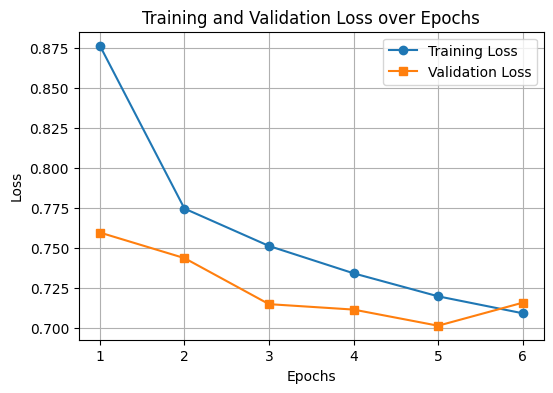

In [ ]:
# Extract training and validation loss values for visualization
loss_history = history.history['loss']
val_loss_history = history.history['val_loss']
epochs_range = range(1, len(loss_history) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epochs_range, loss_history, 'o-', label='Training Loss')
plt.plot(epochs_range, val_loss_history, 's-', label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Model_3.keras')

In [ ]:
y_pred = model.predict(X_test_array)
y_pred

71667/71667 ━━━━━━━━━━━━━━━━━━━━ 90s 1ms/step


array([[3.0077112],
       [2.7758183],
       [1.9900578],
       ...,
       [3.7165687],
       [3.8233435],
       [3.5124497]], dtype=float32)

In [ ]:
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(y_pred, y_test)
mse_dl = mse_metric.result().numpy()
print(f"Deep Learning Mean Squared Error: {mse_dl}")

Deep Learning Mean Squared Error: 1.0923174619674683


In [ ]:
classification_predictions_model = [1 if rating >= threshold else 0 for rating in y_pred]
classification_targets_model = [1 if rating >= threshold else 0 for rating in y_test]

accuracy_model = accuracy_score(classification_targets_model, classification_predictions_model)
precision_model = precision_score(classification_targets_model, classification_predictions_model)
recall_model = recall_score(classification_targets_model, classification_predictions_model)
f1_model = f1_score(classification_targets_model, classification_predictions_model)

print(f'Deep Learning Model Classification Metrics:')
print(f'Accuracy: {accuracy_model:.4f}')
print(f'Precision: {precision_model:.4f}')
print(f'Recall: {recall_model:.4f}')
print(f'F1 Score: {f1_model:.4f}')

Deep Learning Model Classification Metrics:
Accuracy: 0.8016
Precision: 0.8669
Recall: 0.8008
F1 Score: 0.8326


Function **predict_ratings_for_user** Description

- **Input**: A trained model, a specific user ID, encoders for users and movies, and the total number of movies (n_movies)
- **Process**: Encode user and movie IDs, predict ratings for all movies, and store the predicted ratings in an array
- **Output**: An array containing the predicted ratings for all movies.

In [ ]:
def predict_ratings_for_user(model, original_user_id, user_encoder, movie_encoder, n_movies):

    # Check if user_id exist then encode it
    if original_user_id not in user_enc.classes_:
        raise ValueError(f"User ID {original_user_id} is not in the training data.")
    encoded_user_id = user_enc.transform([original_user_id])[0]

    # Initialize array to store predicted ratings
    user_ratings = np.zeros(n_movies)

    # Predict rating for all movies
    for original_movie_id in movie_encoder.classes_:
        encoded_movie_id = movie_encoder.transform([original_movie_id])[0] # Encode the movie ID
        # Predict the rating for the user-movie pair
        predicted_rating = model.predict([np.array([encoded_user_id]), np.array([encoded_movie_id])], verbose=0)
        user_ratings[encoded_movie_id] = predicted_rating[0][0]  # Store predicted rating

    return user_ratings

Function **recommend_top_movies_for_user** Description

- **Input**: A trained model, a specific user ID, encoders for users and movies, the dataset with movie details, and the number of top recommendations (top_n)
- **Process**: Predict ratings for all movies, rank the movies by predicted ratings, and retrieve the titles of the top-rated movies
- **Output**: A sorted DataFrame containing the top N recommended movies with their IDs, predicted ratings, and titles

In [ ]:
def recommend_top_movies_for_user(model, original_user_id, user_encoder, movie_encoder, top_n=10):
    # Validate and encode the user ID
    if original_user_id not in user_encoder.classes_:
        raise ValueError(f"User ID {original_user_id} is not in the dataset.")

    n_movies = len(movie_encoder.classes_)  # Total number of movies
    predicted_ratings = predict_ratings_for_user(model, original_user_id, user_encoder, movie_encoder, n_movies)

    # Get the indices of the top N movies
    top_encoded_movie_ids = np.argsort(predicted_ratings)[::-1][:top_n]
    top_original_movie_ids = movie_encoder.inverse_transform(top_encoded_movie_ids)

    # Retrieve movie titles from the original dataset
    top_movie_titles = df_reduced[df_reduced['movie_id'].isin(top_original_movie_ids)][['movie_id', 'movie_title']].drop_duplicates()

    # Create recommendation DataFrame
    recommendations = pd.DataFrame({
        'movie_id': top_original_movie_ids,
        'predicted_rating': predicted_ratings[top_encoded_movie_ids]
    })
    top_movies = recommendations.merge(top_movie_titles, on='movie_id', how='inner')

    return top_movies.sort_values(by='predicted_rating', ascending=False)

In [ ]:
top_10_movies_dl = recommend_top_movies_for_user(
        model=model,
        original_user_id=user_id,
        user_encoder=user_enc,
        movie_encoder=movie_enc,
        top_n=10
)
top_10_movies_dl

,movie_id,predicted_rating,movie_title
0,7230,4.716885,The Lord of the Rings: The Fellowship of the R...
1,14961,4.698438,Lord of the Rings: The Return of the King: Ext...
2,7057,4.674412,Lord of the Rings: The Two Towers: Extended Ed...
3,14240,4.652259,Lord of the Rings: The Return of the King
4,2452,4.522939,Lord of the Rings: The Fellowship of the Ring
5,10042,4.479180,Raiders of the Lost Ark
6,5582,4.470667,Star Wars: Episode V: The Empire Strikes Back
7,11521,4.452116,Lord of the Rings: The Two Towers
8,12293,4.403530,The Godfather
9,3456,4.371739,Lost: Season 1


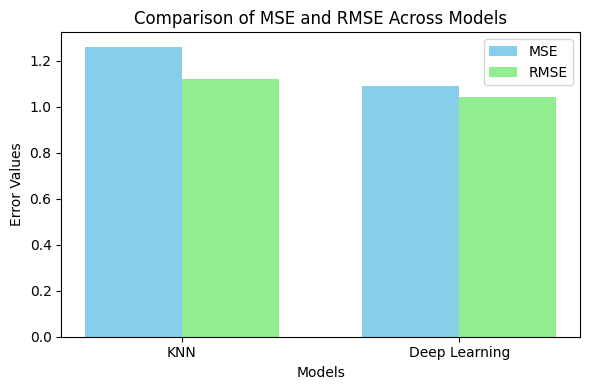

In [ ]:
# Data MSE and RMSE of models
models = ['KNN', 'Deep Learning']
mse_values = [1.26, 1.09]
rmse_values = [1.12, 1.04]

x = np.arange(len(models))
bar_width = 0.35

plt.figure(figsize=(6, 4))

# MSE
plt.bar(x - bar_width/2, mse_values, bar_width, label='MSE', color='skyblue')
# RMSE
plt.bar(x + bar_width/2, rmse_values, bar_width, label='RMSE', color='lightgreen')

plt.xticks(x, models)
plt.title('Comparison of MSE and RMSE Across Models')
plt.xlabel('Models')
plt.ylabel('Error Values')
plt.legend()

plt.tight_layout()
plt.show()


The bar chart compares the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for two models: KNN and Deep Learning.

- Deep Learning achieves the lowest error values, with an MSE of 1.09 and RMSE of 1.04, showcasing its superior ability to model complex relationships and deliver more accurate predictions.  
- KNN, while slightly less accurate, records an MSE of 1.26 and RMSE of 1.12, indicating reasonable performance but falling short compared to Deep Learning.

The results highlight Deep Learning's effectiveness as the best performing model, while KNN provides acceptable performance and may be preferable in scenarios requiring computational simplicity.

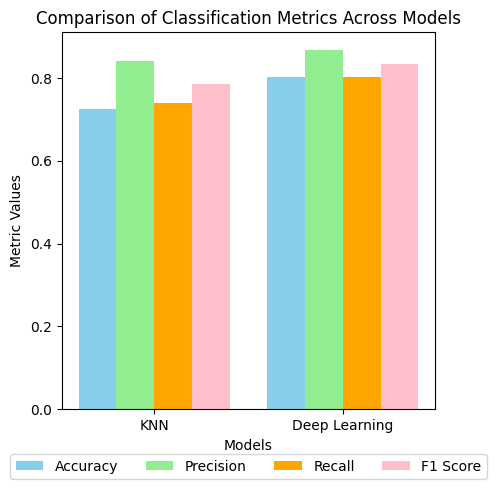

In [ ]:
# Data for metrics
models = ['KNN', 'Deep Learning']
accuracy_values = [accuracy_knn, accuracy_model]
precision_values = [precision_knn, precision_model]
recall_values = [recall_knn, recall_model]
f1_values = [f1_knn, f1_model]

x = np.arange(len(models))
bar_width = 0.2

plt.figure(figsize=(5, 5))

# Accuracy
plt.bar(x - 1.5 * bar_width, accuracy_values, bar_width, label='Accuracy', color='skyblue')
# Precision
plt.bar(x - 0.5 * bar_width, precision_values, bar_width, label='Precision', color='lightgreen')
# Recall
plt.bar(x + 0.5 * bar_width, recall_values, bar_width, label='Recall', color='orange')
# F1 Score
plt.bar(x + 1.5 * bar_width, f1_values, bar_width, label='F1 Score', color='pink')

plt.xticks(x, models)
plt.title('Comparison of Classification Metrics Across Models')
plt.xlabel('Models')
plt.ylabel('Metric Values')

# Move the legend outside the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

plt.tight_layout()
plt.show()

1. KNN:  
   - Provides decent accuracy and recall but lags behind Deep Learning in precision and F1 Score
   - Suitable for scenarios requiring moderate performance but not the most optimal choice for high precision or balanced results

2. Deep Learning:  
   - Outperforms KNN in all classification metrics, including accuracy, precision, recall, and F1 Score
   - The most reliable and effective model for delivering consistent and accurate recommendations